In [ ]:
!pip install plotly
!pip install cufflinks
!pip install textblob
!pip install -U pip setuptools wheel
!pip install -U spacy
!pip install nltk
!python -m spacy download en_core_web_sm
!pip install wordcloud

In [106]:
import pandas as pd
import numpy as np
import re 
import xlrd # to read excel
import nltk # NLP toolkit
import matplotlib.pyplot as plt # for visualization
import string # for handling string
import seaborn as sns
import spacy

In [107]:
import plotly as py
import cufflinks as cf

In [108]:
from plotly.offline import iplot

In [109]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [110]:
summary = pd.read_excel('dataset.xlsx') 
summary.head()

,Title,Authors,Date,UID,Summary,PDF URL,Cyber_Risk,Not_Cyber
0,Cyber security and the Leviathan,['Joseph Da Silva'],2022-03-10,2203.05256v1,Dedicated cyber-security functions are common ...,http://arxiv.org/pdf/2203.05256v1.pdf,1.0,0.0
1,Evaluation of Machine Learning Algorithms in N...,"['Tuan-Hong Chua', 'Iftekhar Salam']",2022-03-10,2203.05232v1,Cybersecurity has become one of the focuses of...,http://arxiv.org/pdf/2203.05232v1.pdf,1.0,0.0
2,Getting Critical: Making Sense of the EU Cyber...,"['Ian Walden', 'Johan David Michels']",2022-03-09,2203.04887v1,"In this chapter, we review how the EU cybersec...",http://arxiv.org/pdf/2203.04887v1.pdf,1.0,0.0
3,Adaptative Perturbation Patterns: Realistic Ad...,"['João Vitorino', 'Nuno Oliveira', 'Isabel Pra...",2022-03-08,2203.04234v1,Adversarial attacks pose a major threat to mac...,http://arxiv.org/pdf/2203.04234v1.pdf,NaN,NaN
4,Guidelines for cyber risk management in shipbo...,"['Priyanga Rajaram', 'Mark Goh', 'Jianying Zhou']",2022-03-08,2203.04072v2,"Over the past few years, we have seen several ...",http://arxiv.org/pdf/2203.04072v2.pdf,NaN,NaN


In [111]:
print(summary.isnull().sum()) 

Title            0
Authors          0
Date             0
UID              0
Summary          0
PDF URL          0
Cyber_Risk    1709
Not_Cyber     1709
dtype: int64


In [112]:
new = summary.drop(['Date', 'UID', 'PDF URL', 'Cyber_Risk', 'Not_Cyber'], axis=1) 
new.head()

,Title,Authors,Summary
0,Cyber security and the Leviathan,['Joseph Da Silva'],Dedicated cyber-security functions are common ...
1,Evaluation of Machine Learning Algorithms in N...,"['Tuan-Hong Chua', 'Iftekhar Salam']",Cybersecurity has become one of the focuses of...
2,Getting Critical: Making Sense of the EU Cyber...,"['Ian Walden', 'Johan David Michels']","In this chapter, we review how the EU cybersec..."
3,Adaptative Perturbation Patterns: Realistic Ad...,"['João Vitorino', 'Nuno Oliveira', 'Isabel Pra...",Adversarial attacks pose a major threat to mac...
4,Guidelines for cyber risk management in shipbo...,"['Priyanga Rajaram', 'Mark Goh', 'Jianying Zhou']","Over the past few years, we have seen several ..."


In [ ]:
' '.join(new['Summary'].tolist())

In [114]:
new['summary_in_lowercase']=new['Summary'].apply(lambda x: x.lower())
new.head()

,Title,Authors,Summary,summary_in_lowercase
0,Cyber security and the Leviathan,['Joseph Da Silva'],Dedicated cyber-security functions are common ...,dedicated cyber-security functions are common ...
1,Evaluation of Machine Learning Algorithms in N...,"['Tuan-Hong Chua', 'Iftekhar Salam']",Cybersecurity has become one of the focuses of...,cybersecurity has become one of the focuses of...
2,Getting Critical: Making Sense of the EU Cyber...,"['Ian Walden', 'Johan David Michels']","In this chapter, we review how the EU cybersec...","in this chapter, we review how the eu cybersec..."
3,Adaptative Perturbation Patterns: Realistic Ad...,"['João Vitorino', 'Nuno Oliveira', 'Isabel Pra...",Adversarial attacks pose a major threat to mac...,adversarial attacks pose a major threat to mac...
4,Guidelines for cyber risk management in shipbo...,"['Priyanga Rajaram', 'Mark Goh', 'Jianying Zhou']","Over the past few years, we have seen several ...","over the past few years, we have seen several ..."


In [115]:
new['summary_without_punkt']=new['summary_in_lowercase'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
new.head()

,Title,Authors,Summary,summary_in_lowercase,summary_without_punkt
0,Cyber security and the Leviathan,['Joseph Da Silva'],Dedicated cyber-security functions are common ...,dedicated cyber-security functions are common ...,dedicated cybersecurity functions are common i...
1,Evaluation of Machine Learning Algorithms in N...,"['Tuan-Hong Chua', 'Iftekhar Salam']",Cybersecurity has become one of the focuses of...,cybersecurity has become one of the focuses of...,cybersecurity has become one of the focuses of...
2,Getting Critical: Making Sense of the EU Cyber...,"['Ian Walden', 'Johan David Michels']","In this chapter, we review how the EU cybersec...","in this chapter, we review how the eu cybersec...",in this chapter we review how the eu cybersecu...
3,Adaptative Perturbation Patterns: Realistic Ad...,"['João Vitorino', 'Nuno Oliveira', 'Isabel Pra...",Adversarial attacks pose a major threat to mac...,adversarial attacks pose a major threat to mac...,adversarial attacks pose a major threat to mac...
4,Guidelines for cyber risk management in shipbo...,"['Priyanga Rajaram', 'Mark Goh', 'Jianying Zhou']","Over the past few years, we have seen several ...","over the past few years, we have seen several ...",over the past few years we have seen several c...


In [ ]:
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stoplist = set(stopwords.words("english"))

In [117]:
from nltk.tokenize import word_tokenize 

# tokenization
def preprocess(text):
  formatted_text = text.lower()
  tokens = []
  for token in nltk.word_tokenize(formatted_text):
    tokens.append(token)
  tokens = [word for word in tokens if word not in stoplist and word not in string.punctuation]
  formatted_text1 = ' '.join(element for element in tokens)
  formatted_text2 = ''.join([i for i in formatted_text1 if not i.isdigit()])
  return formatted_text2

# remove stop words
new['summary_without_stopw']=new['summary_without_punkt'].apply(lambda x: preprocess(x))

# remove numbers

new['summary_without_num']=new['summary_without_stopw'].apply(lambda x: x.replace(r'\d+',''))

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
new['lemmatized']=new['summary_without_num'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
new_text = ' '.join(new['lemmatized'].tolist())

In [118]:
word_frequency = nltk.FreqDist(nltk.word_tokenize(new_text))
word_frequency

FreqDist({'datum': 2349, 'security': 2263, 'system': 1949, 'attack': 1637, 'model': 1374, 'network': 1315, 'cyber': 1236, 'cybersecurity': 1168, 'paper': 1074, 'propose': 1040, ...})

In [119]:
output = pd.DataFrame(list(word_frequency.items()), columns = ["Word", "Frequency"])

In [120]:
output.to_excel("output.xlsx")

In [121]:
new['summary_len'] = new['Summary'].apply(lambda x: len(x))

In [122]:
new['word_count'] = new['Summary'].apply(lambda x: len(x.split()))

In [123]:
def get_avg_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len=word_len+len(word)
    return word_len/len(words)

In [124]:
new['avg_word_len']=new['lemmatized'].apply(lambda x: get_avg_len(x))

In [125]:
new.head()

,Title,Authors,Summary,summary_in_lowercase,summary_without_punkt,summary_without_stopw,summary_without_num,lemmatized,summary_len,word_count,avg_word_len
0,Cyber security and the Leviathan,['Joseph Da Silva'],Dedicated cyber-security functions are common ...,dedicated cyber-security functions are common ...,dedicated cybersecurity functions are common i...,dedicated cybersecurity functions common comme...,dedicated cybersecurity functions common comme...,dedicated cybersecurity function common commer...,1124,156,8.060241
1,Evaluation of Machine Learning Algorithms in N...,"['Tuan-Hong Chua', 'Iftekhar Salam']",Cybersecurity has become one of the focuses of...,cybersecurity has become one of the focuses of...,cybersecurity has become one of the focuses of...,cybersecurity become one focuses organisations...,cybersecurity become one focuses organisations...,cybersecurity focus organisation number cybera...,1871,301,6.207547
2,Getting Critical: Making Sense of the EU Cyber...,"['Ian Walden', 'Johan David Michels']","In this chapter, we review how the EU cybersec...","in this chapter, we review how the eu cybersec...",in this chapter we review how the eu cybersecu...,chapter review eu cybersecurity regulatory fra...,chapter review eu cybersecurity regulatory fra...,chapter review eu cybersecurity regulatory fra...,953,139,7.268293
3,Adaptative Perturbation Patterns: Realistic Ad...,"['João Vitorino', 'Nuno Oliveira', 'Isabel Pra...",Adversarial attacks pose a major threat to mac...,adversarial attacks pose a major threat to mac...,adversarial attacks pose a major threat to mac...,adversarial attacks pose major threat machine ...,adversarial attacks pose major threat machine ...,adversarial attack pose major threat machine l...,1234,175,7.285714
4,Guidelines for cyber risk management in shipbo...,"['Priyanga Rajaram', 'Mark Goh', 'Jianying Zhou']","Over the past few years, we have seen several ...","over the past few years, we have seen several ...",over the past few years we have seen several c...,past years seen several cyber incidents report...,past years seen several cyber incidents report...,past year see cyber incident report primary ca...,1202,187,6.626168


In [126]:
new['word_count'].iplot(kind = 'hist', colors = 'red', bins=100, xTitle='Word Count', yTitle='Count', title='Word Count Distribution')

In [127]:
new['avg_word_len'].iplot(kind = 'hist', colors = 'orange', bins=50, xTitle='Average Word Length', yTitle='Count', title='Average Word Length Distribution')

In [128]:
new['summary_len'].iplot(kind='hist', color='blue', bins=100, xTitle='Summary Length', yTitle='Count', title='Summary Text Length Distribution')

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

In [130]:
x = new['lemmatized']
vec = CountVectorizer().fit(x)
def get_top_n_words(x, n):
    vec = CountVectorizer().fit(x)
bow=vec.transform(x)
sum_words = bow.sum(axis=0)
words_freq=[(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)
words_freq[:30]

[('datum', 2349),
 ('security', 2263),
 ('system', 1949),
 ('attack', 1637),
 ('model', 1374),
 ('network', 1315),
 ('cyber', 1236),
 ('cybersecurity', 1168),
 ('paper', 1074),
 ('propose', 1040),
 ('approach', 844),
 ('information', 843),
 ('detection', 786),
 ('provide', 766),
 ('method', 732),
 ('result', 718),
 ('threat', 699),
 ('present', 675),
 ('research', 670),
 ('user', 645),
 ('base', 633),
 ('application', 625),
 ('analysis', 592),
 ('use', 588),
 ('study', 576),
 ('new', 540),
 ('risk', 538),
 ('challenge', 535),
 ('learn', 534),
 ('technique', 534)]

In [131]:
top_output=pd.DataFrame(words_freq[:30], columns = ['Word', 'Frequency'])
top_output=top_output.set_index('Word')
top_output.iplot(kind='bar', xTitle='Word', yTitle='Count', title='Top 30 Frequent Words')

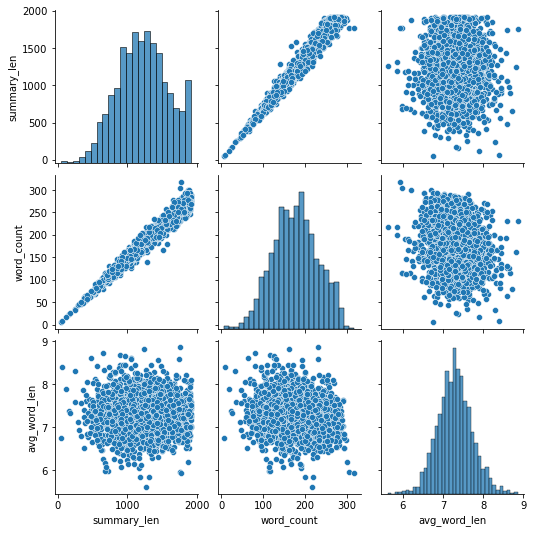

In [132]:
sns.pairplot(new)